In [284]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
import scipy.special as special
from scipy.signal import find_peaks
import pandas as pd
import h5py
import time
import tqdm
from typing import List, Tuple, Sequence

import os
os.chdir(os.getcwd())

#### System parameters

In [285]:
N = 15       # number of loops
lc = 0.12     # magnetic core length / m
l = 7e-2
w = 18e-6 * 4
ur = 70000
u0 = 4* np.pi * 1e-7
u = ur * u0
Ac = l * w   # cross-sectional area / m2
fre = 4      # degauss frequency
T = 20       # deguass time
V_gain = 3.6
# R = 1 * 3.6 / 6  # resistance calculate
R = 1.55
gain = 20

In [286]:
data =  pd.read_csv("0.1Vpp2Hz-4.43off_3_14_2024.csv")
mea_time = np.array(data.Time)
dt = (mea_time[-1] - mea_time[0])/len(mea_time)
N_data  = int((T - 1/fre)/dt)
Vin = np.array(data.ChannelA)
Vpick = np.array(data.ChannelB)
peaks,_ = find_peaks(Vpick,distance=500,height= max(Vpick)*0.9)
print(peaks)

[2900]


In [287]:
time_uesd = mea_time[peaks[0]:peaks[0] + N_data]
Vin_used  = Vin[peaks[0]:peaks[0]+ N_data]
I = Vin_used * V_gain /R
H = np.array(I) * N / lc
Vpick_used = Vpick[peaks[0]:peaks[0] + N_data]+ 0.013

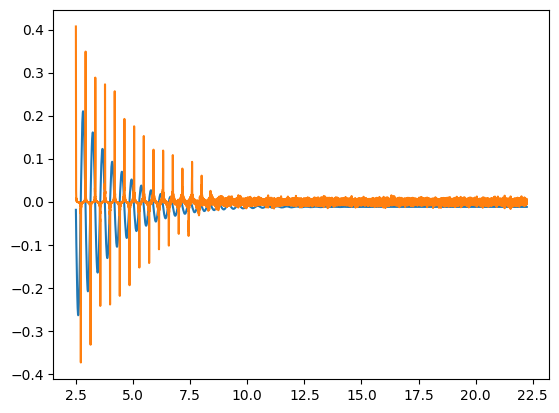

In [288]:
plt.plot(time_uesd,I)
plt.plot(time_uesd,Vpick_used)

In [302]:
B = []
B_int = []
Bini = [0]
dB = -1 * np.array(Vpick_used)/Ac/N/gain
print(np.mean(dB[-1000:-1]))
for a in dB:
        Bini.append(Bini[-1] + (a - np.mean(dB[-1000:-1])+0.006)* dt )
B.append(Bini)
print(B[0])

0.8388161150588422
[0, -0.6649482736576994, -1.0429424462657688, -1.160194941907128, -1.205204830247133, -1.245359041011211, -1.2749331751598896, -1.2929848988015942, -1.3016639047776404, -1.3170134473302098, -1.328037238267208, -1.335296671114607, -1.34124494042801, -1.3485520148048433, -1.3541001110661863, -1.357619745872379, -1.3625397436953157, -1.3674780712616224, -1.3713084087555032, -1.3735525349899294, -1.37716933775129, -1.3807145484184769, -1.3827082885588884, -1.3850680817920533, -1.3877964902199587, -1.3900724113355674, -1.3909510394419056, -1.3935542548228035, -1.3953666501478499, -1.397068073777886, -1.3980591972956944, -1.3994391167836395, -1.4008219708366185, -1.401782969918607, -1.402643697180193, -1.403950071960515, -1.404598381880349, -1.4046927362682184, -1.4055200997846822, -1.4058120632483233, -1.4062190955102565, -1.4065274361021898, -1.4067383830048112, -1.4063483987668866, -1.406471320014727, -1.405995014425145, -1.4059225162328983, -1.4053498327649778, -1.4052

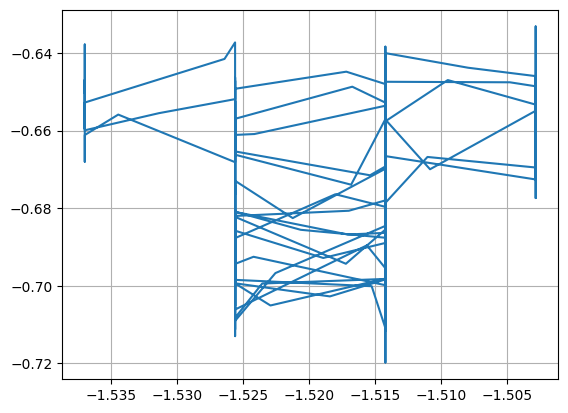

In [303]:
plt.plot(H[-3000:-1],B[0][-3000:-1]-(max(B[0])+min(B[0]))/2,"-")
plt.grid(True)

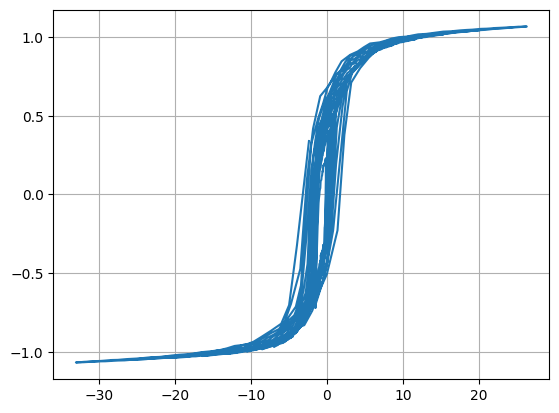

In [304]:
plt.plot(H,B[0][0:-1]-(max(B[0])+min(B[0]))/2,"-")
plt.grid(True)
# plt.plot(Vin_used[-1],B[0][-1]-(max(B[0])-min(B[0]))/2,"o",color = "r")

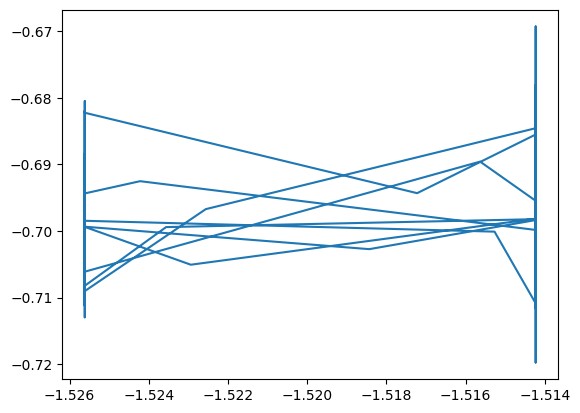

In [305]:
plt.plot(H[-2000:-1],B[0][-2000:-1]-(max(B[0])+min(B[0]))/2,"-")

[61202.5919740232, 654929.6330772685, 557903.0207695249, 1259379.2043457783, 387877.61288119154, 486719.945384872, 399175.01908161456, 849710.5572850638, 548200.3595387503, 37377.29724127848]


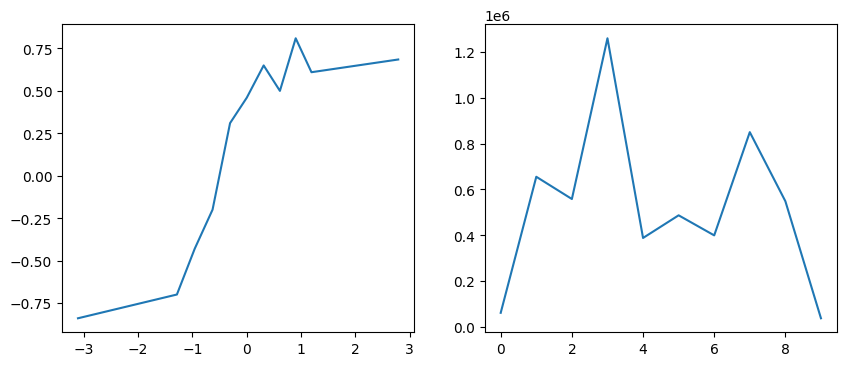

In [326]:
u = []
offs = [-0.0107,-0.00443,-0.0033,-0.00217,-0.00106,0,0.00107,0.0021,0.0031,0.0041,0.0096]
H_settle = np.array(offs) * V_gain /R  * N / lc
B_settle = [-0.84,-0.7,-0.43,-0.2,0.31,0.46,0.65,0.5,0.81,0.61,0.685]
for i in range(len(H_settle)-1):
    u.append(abs((B_settle[i+1]-B_settle[i])/(H_settle[i+1]-H_settle[i]))/u0)
print(u)
fig,ax = plt.subplots(1,2,figsize=(10, 4))
ax[0].plot(H_settle,B_settle)
ax[1].plot(u)

In [294]:
1.5 * 0.0254 * np.pi

0.1196946801017711

In [295]:
20/0.07

285.71428571428567